In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
all_home_data = read_home_data()

Successfully loaded data for EOH0001
File not found for EOH0002. Skipping...
Successfully loaded data for EOH0003
File not found for EOH0004. Skipping...
Successfully loaded data for EOH0005
File not found for EOH0006. Skipping...
File not found for EOH0007. Skipping...
File not found for EOH0008. Skipping...
File not found for EOH0009. Skipping...
File not found for EOH0010. Skipping...
File not found for EOH0011. Skipping...
File not found for EOH0012. Skipping...
File not found for EOH0013. Skipping...
Successfully loaded data for EOH0014
File not found for EOH0015. Skipping...
File not found for EOH0016. Skipping...
File not found for EOH0017. Skipping...
Successfully loaded data for EOH0018
File not found for EOH0019. Skipping...
File not found for EOH0020. Skipping...
Successfully loaded data for EOH0021
File not found for EOH0022. Skipping...
File not found for EOH0023. Skipping...
File not found for EOH0024. Skipping...
Successfully loaded data for EOH0025
Successfully loaded d

In [19]:
home_735 = all_home_data["EOH0735"]
home_735.isnull().sum()

Timestamp                                  0
Circulation_Pump_Energy_Consumed        5850
External_Air_Temperature                5782
Heat_Pump_Energy_Output               325887
Heat_Pump_Heating_Flow_Temperature    340258
Heat_Pump_Return_Temperature          326694
Hot_Water_Flow_Temperature            515941
Internal_Air_Temperature               64362
Whole_System_Energy_Consumed            5848
dtype: int64


--- Processing Home: EOH0732 ---


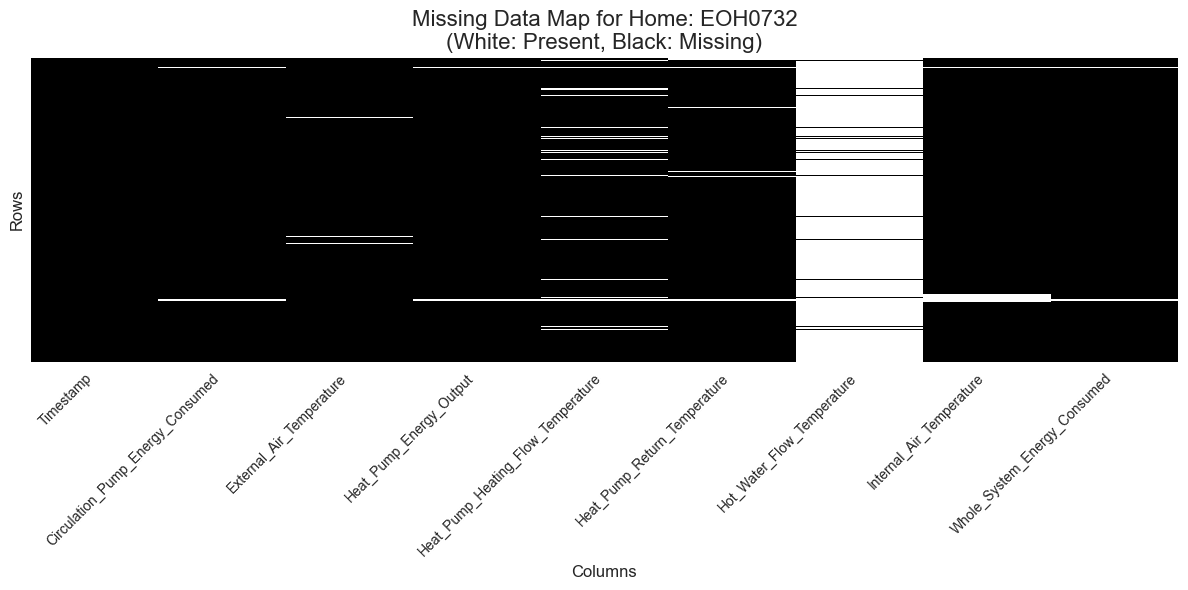

   Missing Data Percentage per Column for EOH0732:
     - Timestamp: 0.00% missing (0 out of 608732 values)
     - Circulation_Pump_Energy_Consumed: 0.89% missing (5422 out of 608732 values)
     - External_Air_Temperature: 1.05% missing (6382 out of 608732 values)
     - Heat_Pump_Energy_Output: 0.89% missing (5429 out of 608732 values)
     - Heat_Pump_Heating_Flow_Temperature: 4.47% missing (27213 out of 608732 values)
     - Heat_Pump_Return_Temperature: 2.65% missing (16133 out of 608732 values)
     - Hot_Water_Flow_Temperature: 96.47% missing (587226 out of 608732 values)
     - Internal_Air_Temperature: 2.69% missing (16345 out of 608732 values)
     - Whole_System_Energy_Consumed: 0.89% missing (5423 out of 608732 values)

   Overall missing data for EOH0732: 12.22% (669573 out of 5478588 values)

--- Processing Home: EOH0735 ---


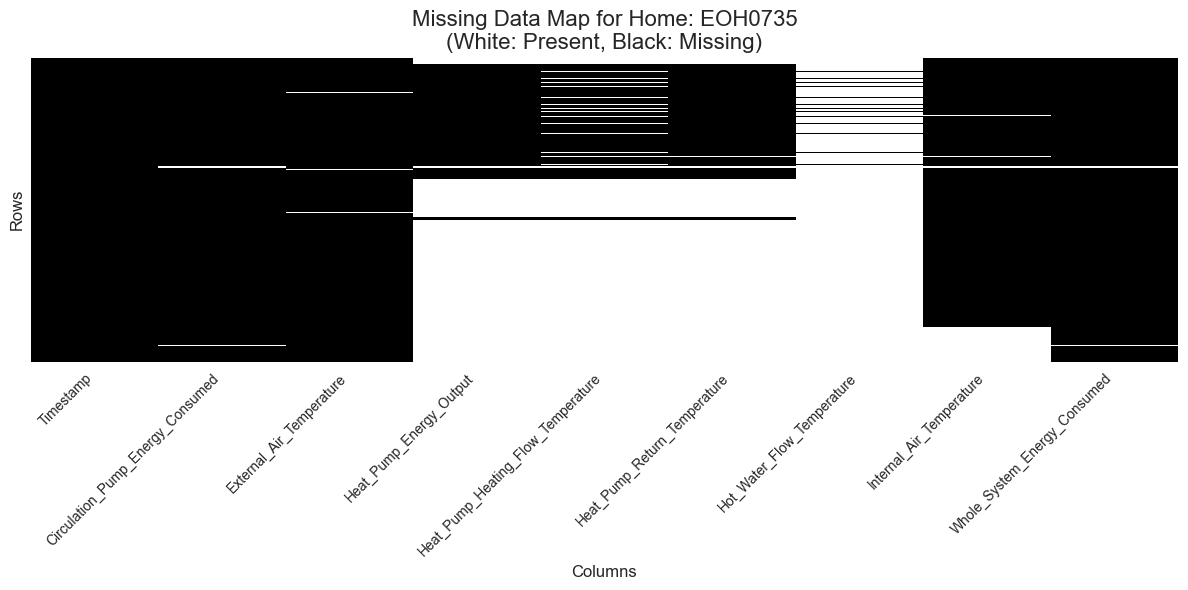

   Missing Data Percentage per Column for EOH0735:
     - Timestamp: 0.00% missing (0 out of 530126 values)
     - Circulation_Pump_Energy_Consumed: 1.10% missing (5850 out of 530126 values)
     - External_Air_Temperature: 1.09% missing (5782 out of 530126 values)
     - Heat_Pump_Energy_Output: 61.47% missing (325887 out of 530126 values)
     - Heat_Pump_Heating_Flow_Temperature: 64.18% missing (340258 out of 530126 values)
     - Heat_Pump_Return_Temperature: 61.63% missing (326694 out of 530126 values)
     - Hot_Water_Flow_Temperature: 97.32% missing (515941 out of 530126 values)
     - Internal_Air_Temperature: 12.14% missing (64362 out of 530126 values)
     - Whole_System_Energy_Consumed: 1.10% missing (5848 out of 530126 values)

   Overall missing data for EOH0735: 33.34% (1590622 out of 4771134 values)


In [21]:
data_check = ["EOH0732","EOH0735"]
plot_missing_data_for_homes(data_check)

In [4]:
def read_home_data(base_path='UK-2-min_data/clean/', start_id=1, end_id=735):
    """
    Reads home data from CSV files, handling missing files.

    Args:
        base_path (str): The base directory where the clean data CSVs are located.
                         Defaults to 'UK-2-min_data/clean/'.
        start_id (int): The starting property ID number (e.g., 1 for EOH0001).
        end_id (int): The ending property ID number (e.g., 735 for EOH0735).

    Returns:
        dict: A dictionary where keys are property IDs (e.g., 'EOH0001')
              and values are pandas DataFrames containing the home data.
              Returns an empty dictionary if no data is found or read.
    """
    home_data_dfs = {}
    
    # Define the expected column names
    expected_columns = [
        'Timestamp', 'Circulation_Pump_Energy_Consumed',
        'External_Air_Temperature', 'Heat_Pump_Energy_Output',
        'Heat_Pump_Heating_Flow_Temperature', 'Heat_Pump_Return_Temperature',
        'Hot_Water_Flow_Temperature', 'Immersion_Heater_Energy_Consumed',
        'Internal_Air_Temperature', 'Whole_System_Energy_Consumed'
    ]

    for i in range(start_id, end_id + 1):
        # Format the property ID with leading zeros (e.g., 1 -> 0001, 10 -> 0010)
        property_id = f'EOH{i:04d}' 
        file_name = f'Property_ID={property_id}.csv'
        file_path = os.path.join(base_path, file_name)

        try:
            df = pd.read_csv(file_path)
            
            # Optional: Check if the columns match the expected ones
            # If your CSVs are guaranteed to have these columns, this check
            # might be redundant, but it's good for robustness.
            if not all(col in df.columns for col in expected_columns):
                print(f"Warning: Columns in {file_name} do not fully match expected columns. Skipping or handling might be needed.")
                # You could choose to skip this file, or try to reindex/rename
                # For now, we'll assume valid files will have the columns.
            
            home_data_dfs[property_id] = df
            print(f"Successfully loaded data for {property_id}")

        except FileNotFoundError:
            print(f"File not found for {property_id}. Skipping...")
        except pd.errors.EmptyDataError:
            print(f"File {file_name} is empty. Skipping...")
        except Exception as e:
            print(f"An error occurred while reading {file_name}: {e}. Skipping...")

    return home_data_dfs

In [20]:
def plot_missing_data_for_homes(home_ids, base_path='UK-2-min_data/clean/'):
    """
    Loads data for specified home(s), presents a black and white figure of missing data,
    and prints the percentage of missing data for each column.

    Args:
        home_ids (str or list): A single property ID string (e.g., 'EOH0001')
                                or a list of property ID strings.
        base_path (str): The base directory where the clean data CSVs are located.
                         Defaults to 'UK-2-min_data/clean/'.
    """

    # Ensure home_ids is a list for consistent iteration
    if isinstance(home_ids, str):
        home_ids = [home_ids]

    # Define a custom colormap for pure black (missing) and pure white (present)
    custom_cmap = plt.cm.colors.ListedColormap(['white', 'black'])

    for home_id in home_ids:
        file_name = f'Property_ID={home_id}.csv'
        file_path = os.path.join(base_path, file_name)

        print(f"\n--- Processing Home: {home_id} ---")

        try:
            df = pd.read_csv(file_path)

            if df.empty:
                print(f"   Warning: Data for {home_id} is empty. Skipping visualization.")
                continue

            # Convert 'Timestamp' column to datetime if it exists and is not already
            if 'Timestamp' in df.columns:
                df['Timestamp'] = pd.to_datetime(df['Timestamp'])

            # --- Generate Black and White Missing Data Map ---
            plt.figure(figsize=(12, 6)) # Adjust figure size as needed

            # We use ~df.isnull() so that True (data present) maps to 1 (white)
            # and False (data missing) maps to 0 (black) using our custom_cmap.
            sns.heatmap(~df.isnull(), cbar=False, cmap=custom_cmap, yticklabels=False)

            # Customize the plot
            plt.title(f'Missing Data Map for Home: {home_id}\n(White: Present, Black: Missing)', fontsize=16)
            plt.xlabel('Columns', fontsize=12)
            plt.ylabel('Rows', fontsize=12)

            # Set x-ticks to column names for readability
            plt.xticks(ticks=np.arange(len(df.columns)) + 0.5, labels=df.columns, rotation=45, ha='right')
            plt.tick_params(axis='x', labelsize=10) # Adjust x-axis label font size

            plt.tight_layout() # Adjust layout to prevent labels from overlapping
            plt.show()

            # --- Calculate and Print Missing Data Percentage per Column ---
            missing_counts = df.isnull().sum()
            total_rows = len(df)
            
            if total_rows == 0:
                print(f"   No data rows found for {home_id} to calculate missing percentages.")
                continue

            missing_percentages = (missing_counts / total_rows) * 100

            print(f"   Missing Data Percentage per Column for {home_id}:")
            # Filter to show only columns with missing data, or show all if desired
            # We'll show all to give a complete picture
            for col, percent in missing_percentages.items():
                print(f"     - {col}: {percent:.2f}% missing ({missing_counts[col]} out of {total_rows} values)")

            # Overall missing data
            total_missing_values = df.isnull().sum().sum()
            total_values = df.size # total elements (rows * columns)
            if total_values > 0:
                overall_missing_percent = (total_missing_values / total_values) * 100
                print(f"\n   Overall missing data for {home_id}: {overall_missing_percent:.2f}% "
                      f"({total_missing_values} out of {total_values} values)")
            else:
                print("   No data points to calculate overall missing percentage.")

        except FileNotFoundError:
            print(f"   File not found for {home_id}. Skipping...")
        except pd.errors.EmptyDataError:
            print(f"   File {file_name} is empty. Skipping...")
        except Exception as e:
            print(f"   An error occurred while reading or processing {file_name}: {e}. Skipping...")
